<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/Principal_Component_Analysis_and_Diagnosis_of_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classify fetal health in order to prevent child and maternal mortality**

**Install Pycaret**

In [89]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 30.1 MB/s eta 0:00:00
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


**Import Libraries**

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


# Context
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

# Dataset:

The “Fetal Health Classification” used for Principal Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provides information about fetal health.

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes: Normal, Suspect and Pathological.

All attributes are numerical and they are listed below:

In [6]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/fetal_health.csv')
df.head(500)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120.0          0.000           0.000                 0.000   
1             132.0          0.006           0.000                 0.006   
2             133.0          0.003           0.000                 0.008   
3             134.0          0.003           0.000                 0.008   
4             132.0          0.007           0.000                 0.008   
..              ...            ...             ...                   ...   
495           127.0          0.011           0.033                 0.002   
496           130.0          0.014           0.092                 0.001   
497           130.0          0.016           0.084                 0.002   
498           130.0          0.015           0.115                 0.000   
499           130.0          0.014           0.084                 0.001   

     light_decelerations  severe_decelerations  prolongued_decelerations  \
0                  0.000                   0.0                       0.0   
1                  0.003                   0.0                       0.0   
2                  0.003                   0.0                       0.0   
3                  0.003                   0.0                       0.0   
4                  0.000                   0.0                       0.0   
..                   ...                   ...                       ...   
495                0.000                   0.0                       0.0   
496                0.000                   0.0                       0.0   
497                0.000                   0.0                       0.0   
498                0.000                   0.0                       0.0   
499                0.000                   0.0                       0.0   

     abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73.0                                   0.5   
1                               17.0                                   2.1   
2                               16.0                                   2.1   
3                               16.0                                   2.4   
4                               16.0                                   2.4   
..                               ...                                   ...   
495                             38.0                                   1.4   
496                             32.0                                   2.4   
497                             34.0                                   2.1   
498                             31.0                                   2.6   
499                             34.0                                   2.1   

     percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                 43.0       ...   
1                                                  0.0       ...   
2                                                  0.0       ...   
3                                                  0.0       ...   
4                                                  0.0       ...   
..                                                 ...       ...   
495                                                0.0       ...   
496                                                0.0       ...   
497                                                0.0       ...   
498                                                0.0       ...   
499                                                0.0       ...   

     histogram_min  histogram_max  histogram_number_of_peaks  \
0             62.0          126.0                        2.0   
1             68.0          198.0                        6.0   
2             68.0          198.0                        5.0   
3             53.0          170.0                       11.0   
4             53.0          170.0                        9.0   
..             ...            ...        

In [7]:
len(df.index)

2126

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [11]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [10]:
df = df.drop_duplicates()

In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [12]:
columns_to_drop = ['mean_value_of_long_term_variability', 'histogram_variance',
       'histogram_median', 'uterine_contractions', 'baseline value',
       'histogram_tendency', 'severe_decelerations',
       'mean_value_of_short_term_variability', 'fetal_movement',
       'histogram_width', 'histogram_min', 'light_decelerations',
       'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes']

df.drop(columns=columns_to_drop, axis=1, inplace=True)

**Exploratory Data Analysis**

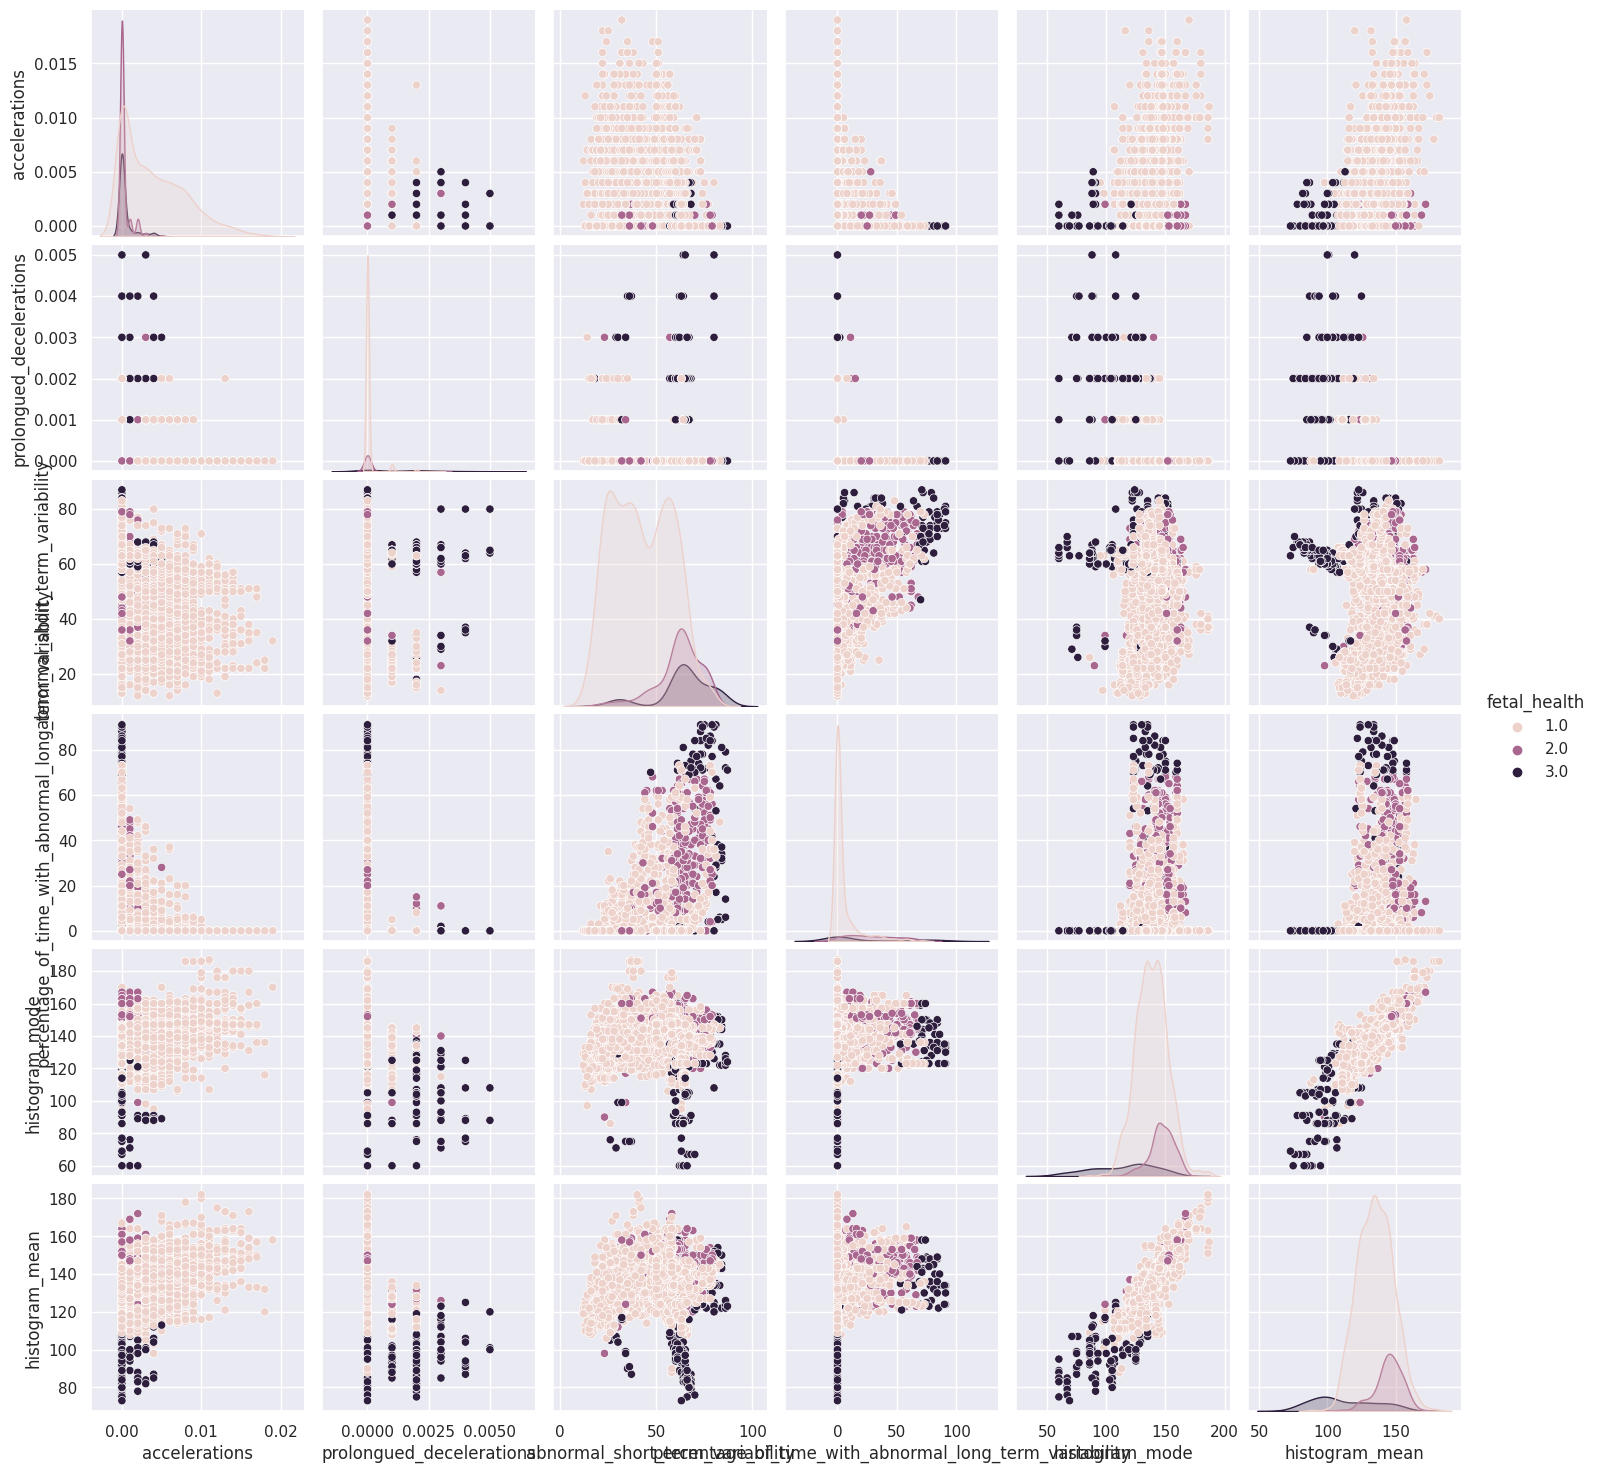

In [13]:
sns.pairplot(df, hue='fetal_health')
plt.show()

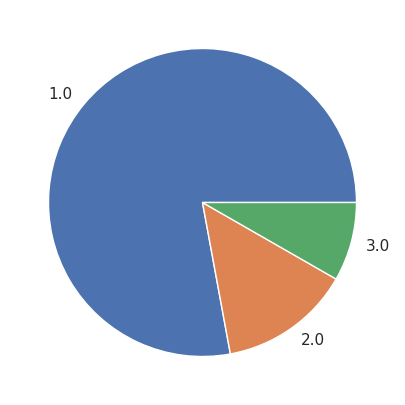

In [14]:
y =df['fetal_health']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [15]:
X = df.drop(columns=['fetal_health'])
X.head(500)

accelerations  prolongued_decelerations  abnormal_short_term_variability  \
0            0.000                       0.0                             73.0   
1            0.006                       0.0                             17.0   
2            0.003                       0.0                             16.0   
3            0.003                       0.0                             16.0   
4            0.007                       0.0                             16.0   
..             ...                       ...                              ...   
500          0.014                       0.0                             29.0   
501          0.015                       0.0                             31.0   
502          0.008                       0.0                             36.0   
503          0.008                       0.0                             34.0   
504          0.008                       0.0                             40.0   

     percentage_of_time_with_abnormal_long_term_variability  histogram_mode  \
0                                                 43.0                120.0   
1                                                  0.0                141.0   
2                                                  0.0                141.0   
3                                                  0.0                137.0   
4                                                  0.0                137.0   
..                                                 ...                  ...   
500                                                0.0                150.0   
501                                                0.0                150.0   
502                                                0.0                154.0   
503                                                0.0                159.0   
504                                                0.0                129.0   

     histogram_mean  
0             137.0  
1             136.0  
2             135.0  
3             134.0  
4             136.0  
..              ...  
500           144.0  
501           144.0  
502           148.0  
503           146.0  
504           139.0  

[500 rows x 6 columns]

In [16]:
X.describe().transpose()

count        mean  \
accelerations                                       2113.0    0.003188   
prolongued_decelerations                            2113.0    0.000159   
abnormal_short_term_variability                     2113.0   46.993848   
percentage_of_time_with_abnormal_long_term_vari...  2113.0    9.795078   
histogram_mode                                      2113.0  137.454330   
histogram_mean                                      2113.0  134.599621   

                                                          std   min    25%  \
accelerations                                        0.003871   0.0    0.0   
prolongued_decelerations                             0.000592   0.0    0.0   
abnormal_short_term_variability                     17.177782  12.0   32.0   
percentage_of_time_with_abnormal_long_term_vari...  18.337073   0.0    0.0   
histogram_mode                                      16.402026  60.0  129.0   
histogram_mean                                      15.610422  73.0  125.0   

                                                        50%      75%      max  
accelerations                                         0.002    0.006    0.019  
prolongued_decelerations                              0.000    0.000    0.005  
abnormal_short_term_variability                      49.000   61.000   87.000  
percentage_of_time_with_abnormal_long_term_vari...    0.000   11.000   91.000  
histogram_mode                                      139.000  148.000  187.000  
histogram_mean                                      136.000  145.000  182.000

**Standardize the Data**

In [17]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

accelerations  prolongued_decelerations  abnormal_short_term_variability  \
0      -0.823776                 -0.269640                         1.514300   
1       0.726444                 -0.269640                        -1.746497   
2      -0.048666                 -0.269640                        -1.804726   
3      -0.048666                 -0.269640                        -1.804726   
4       0.984814                 -0.269640                        -1.804726   
5      -0.565406                  3.111658                        -1.222441   
6      -0.565406                  4.802307                        -1.047755   
7      -0.823776                 -0.269640                         2.096585   
8      -0.823776                 -0.269640                         2.154813   
9      -0.823776                 -0.269640                         2.271270   

   percentage_of_time_with_abnormal_long_term_variability  histogram_mode  \
0                                           1.811237            -1.064409   
1                                          -0.534294             0.216224   
2                                          -0.534294             0.216224   
3                                          -0.534294            -0.027706   
4                                          -0.534294            -0.027706   
5                                          -0.534294            -3.747639   
6                                          -0.534294            -4.052552   
7                                          -0.207011            -0.942444   
8                                          -0.261558            -0.942444   
9                                          -0.207011            -0.942444   

   histogram_mean  
0        0.153804  
1        0.089729  
2        0.025654  
3       -0.038421  
4        0.089729  
5       -1.768444  
6       -1.768444  
7       -0.807320  
8       -0.807320  
9       -0.807320

In [18]:
X.describe().transpose()

count          mean  \
accelerations                                       2113.0  6.725440e-18   
prolongued_decelerations                            2113.0  4.035264e-17   
abnormal_short_term_variability                     2113.0 -1.345088e-17   
percentage_of_time_with_abnormal_long_term_vari...  2113.0  2.690176e-17   
histogram_mode                                      2113.0 -1.614106e-16   
histogram_mean                                      2113.0  3.497229e-16   

                                                         std       min  \
accelerations                                       1.000237 -0.823776   
prolongued_decelerations                            1.000237 -0.269640   
abnormal_short_term_variability                     1.000237 -2.037640   
percentage_of_time_with_abnormal_long_term_vari...  1.000237 -0.534294   
histogram_mode                                      1.000237 -4.723360   
histogram_mean                                      1.000237 -3.946992   

                                                         25%       50%  \
accelerations                                      -0.823776 -0.307036   
prolongued_decelerations                           -0.269640 -0.269640   
abnormal_short_term_variability                    -0.873069  0.116815   
percentage_of_time_with_abnormal_long_term_vari... -0.534294 -0.534294   
histogram_mode                                     -0.515566  0.094259   
histogram_mean                                     -0.615095  0.089729   

                                                         75%       max  
accelerations                                       0.726444  4.085254  
prolongued_decelerations                           -0.269640  8.183605  
abnormal_short_term_variability                     0.815557  2.329499  
percentage_of_time_with_abnormal_long_term_vari...  0.065725  4.429504  
histogram_mode                                      0.643101  3.021419  
histogram_mean                                      0.666404  3.037176

**Observations and variables**

In [19]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

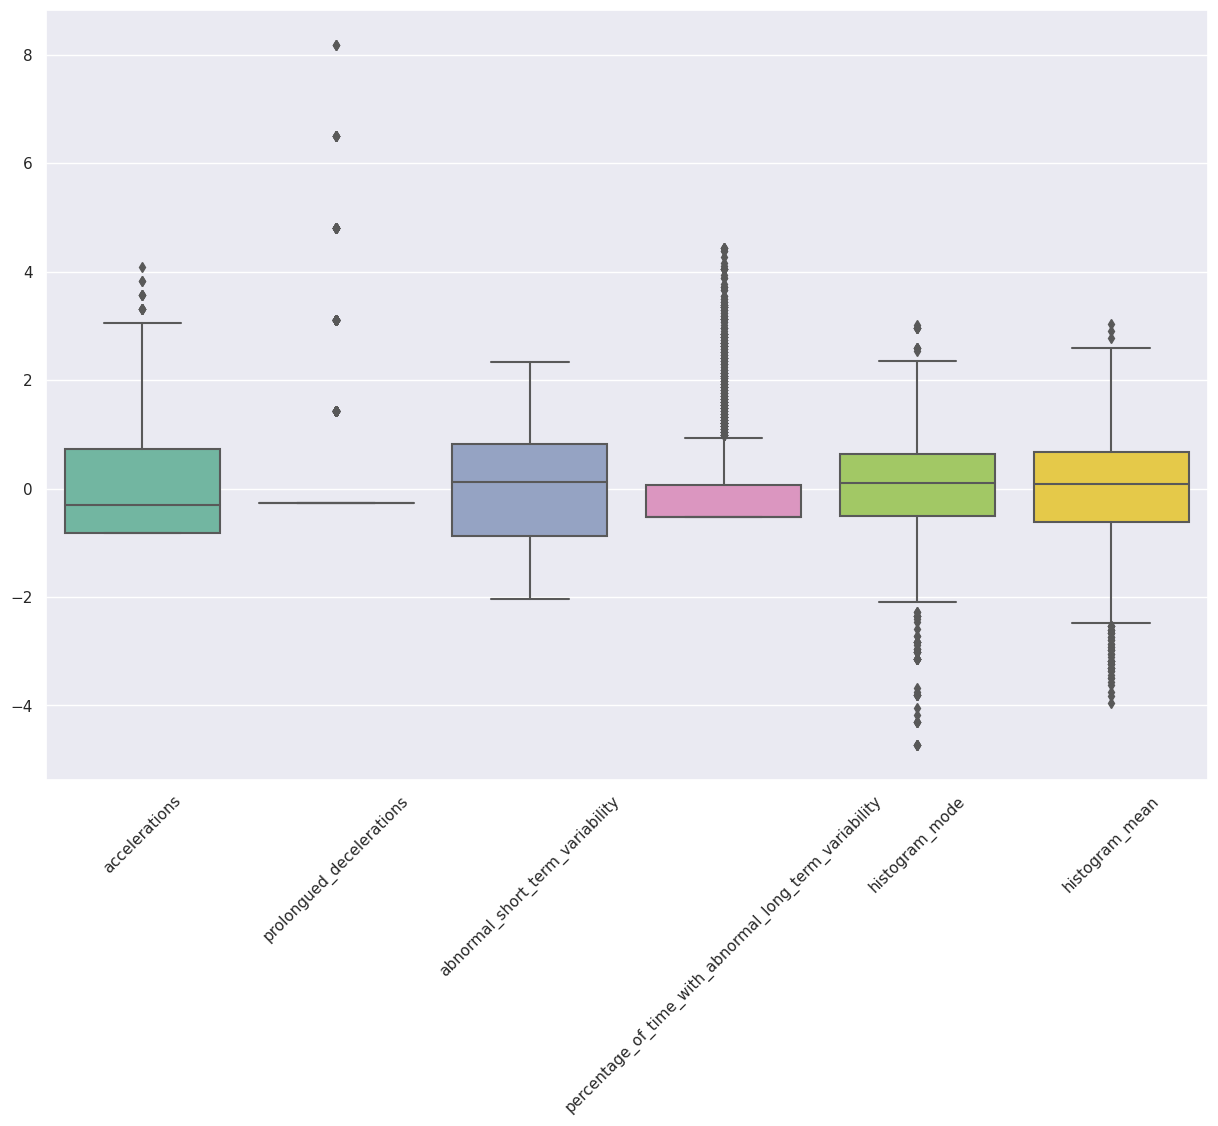

In [20]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


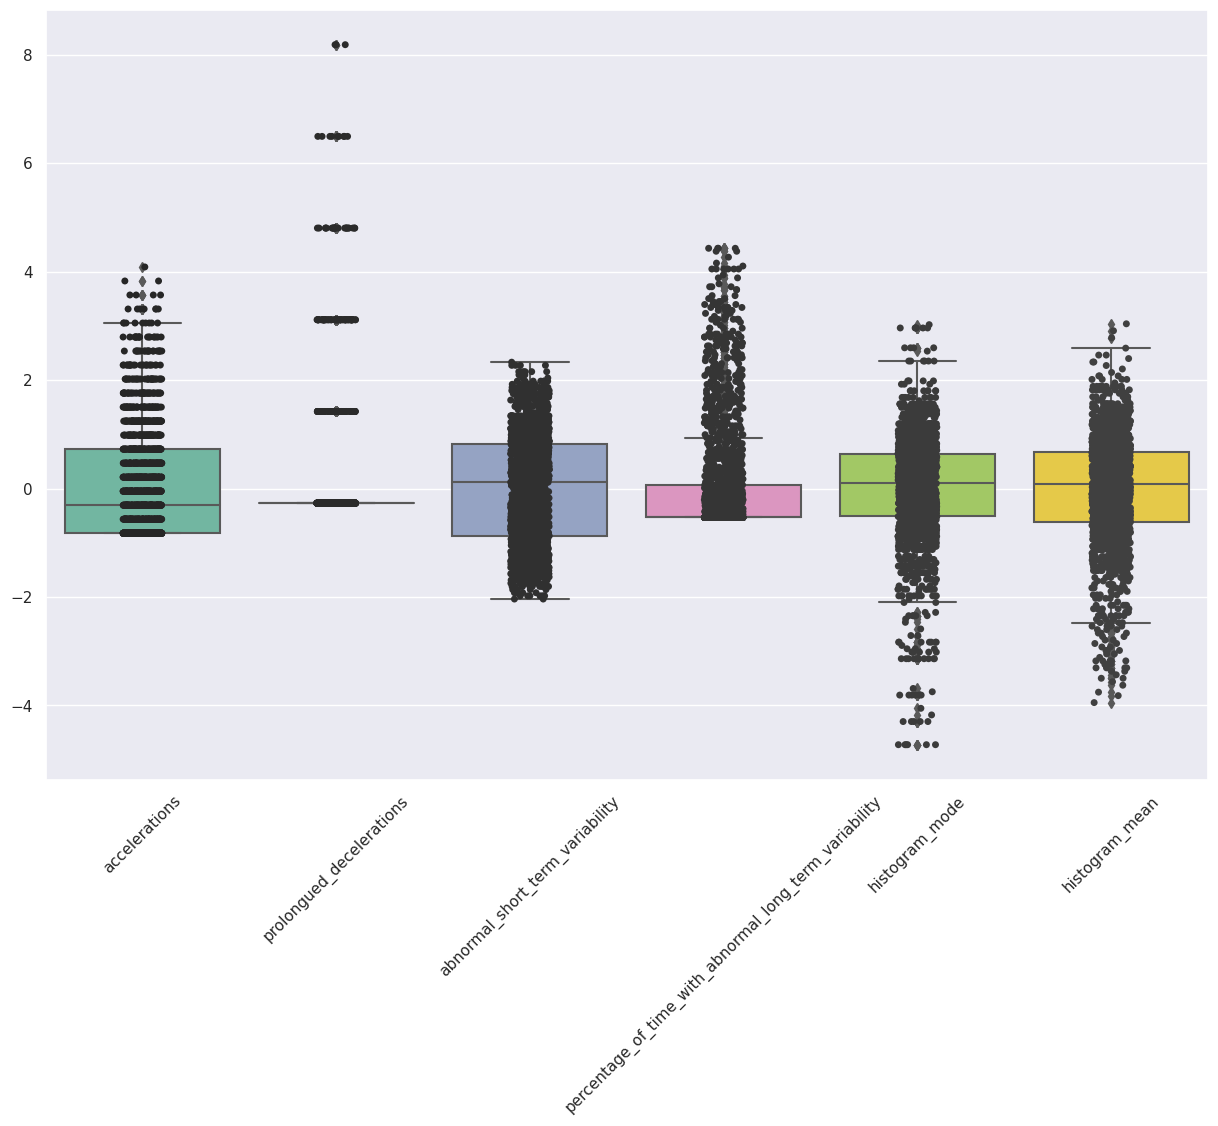

In [21]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

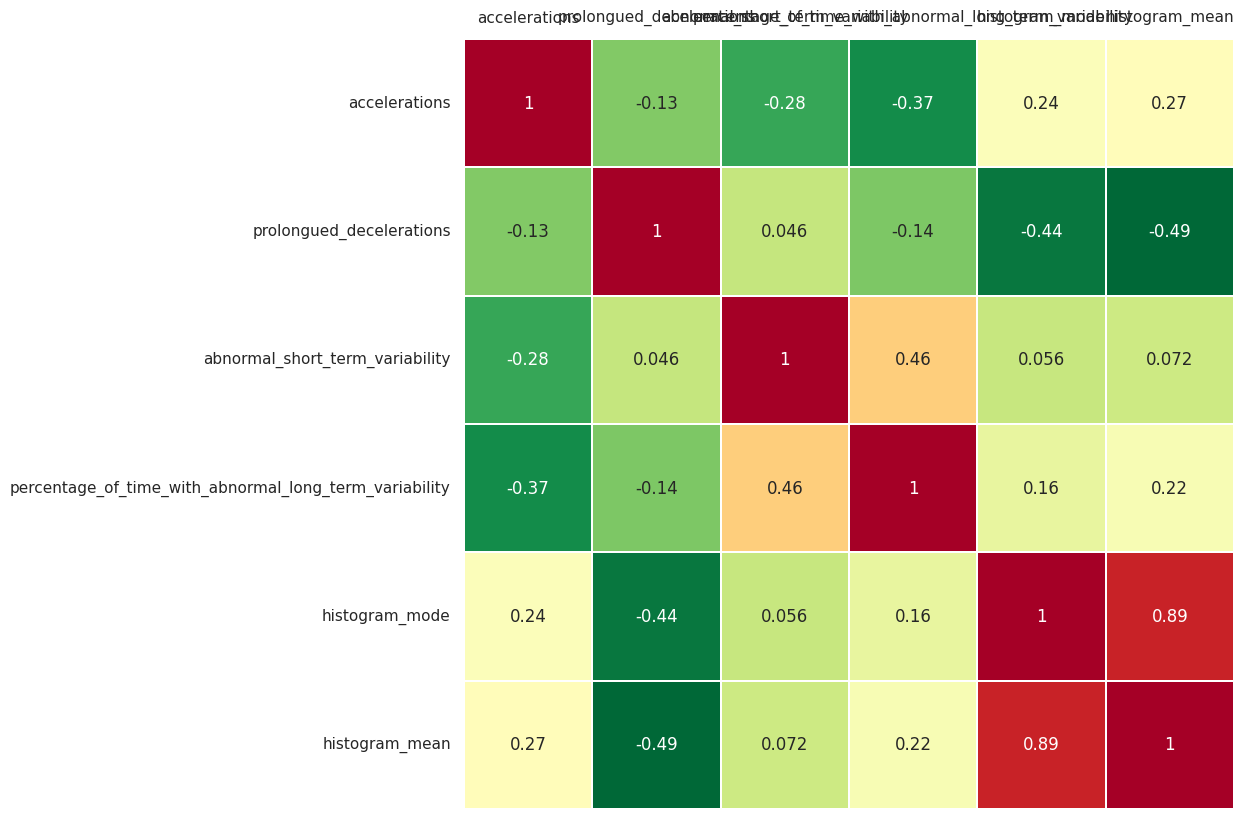

In [22]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, '$Z_2$')

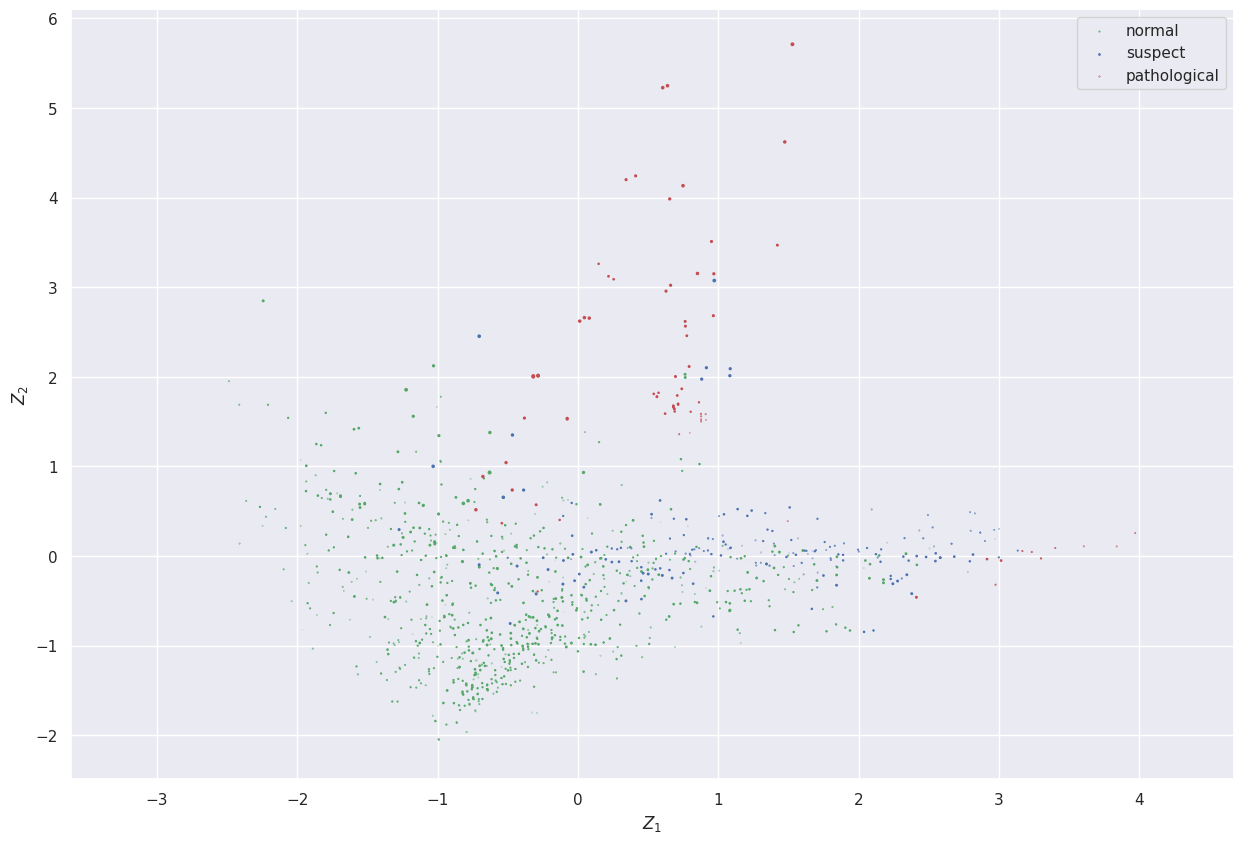

In [25]:
pca = PCA()
Z = pca.fit_transform(X)


idx_normal= np.where(y == 1)
idx_suspect= np.where(y == 2)
idx_pathological = np.where(y == 3)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_normal,1], Z[idx_normal,2], Z[idx_normal,3], c='g', label='normal')
plt.scatter(Z[idx_suspect,1], Z[idx_suspect,2], Z[idx_suspect,3], c='b', label='suspect')
plt.scatter(Z[idx_pathological,1], Z[idx_pathological,2], Z[idx_pathological,3], c='r', label='pathological')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[-0.20652696, -0.53842592,  0.47641025, -0.45221108,  0.48169303,
        -0.06288394],
       [ 0.4403972 ,  0.03152589,  0.67092254,  0.58243865,  0.11404308,
         0.05175676],
       [-0.05728529,  0.5778101 ,  0.5162541 , -0.51038051, -0.36857315,
        -0.0010754 ],
       [-0.17560784,  0.612172  , -0.09591274,  0.06837395,  0.75818848,
        -0.07538778],
       [-0.59508503, -0.02157373,  0.16766845,  0.35645476, -0.19812009,
        -0.6715535 ],
       [-0.61249572, -0.00437658,  0.13807953,  0.25307529, -0.07084142,
         0.73259693]])

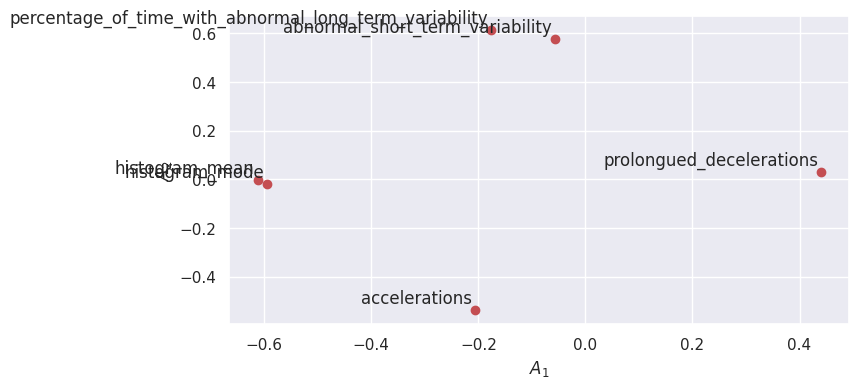

In [26]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

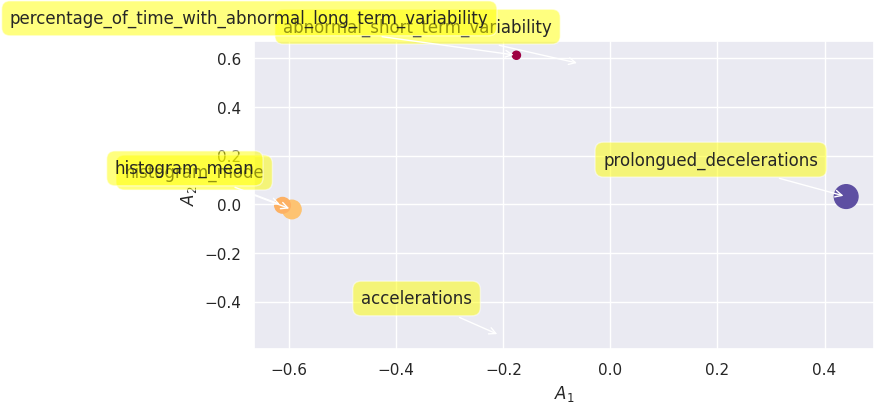

In [27]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([2.3820805 , 1.74597531, 0.75426011, 0.56304308, 0.45674374,
       0.10073816])

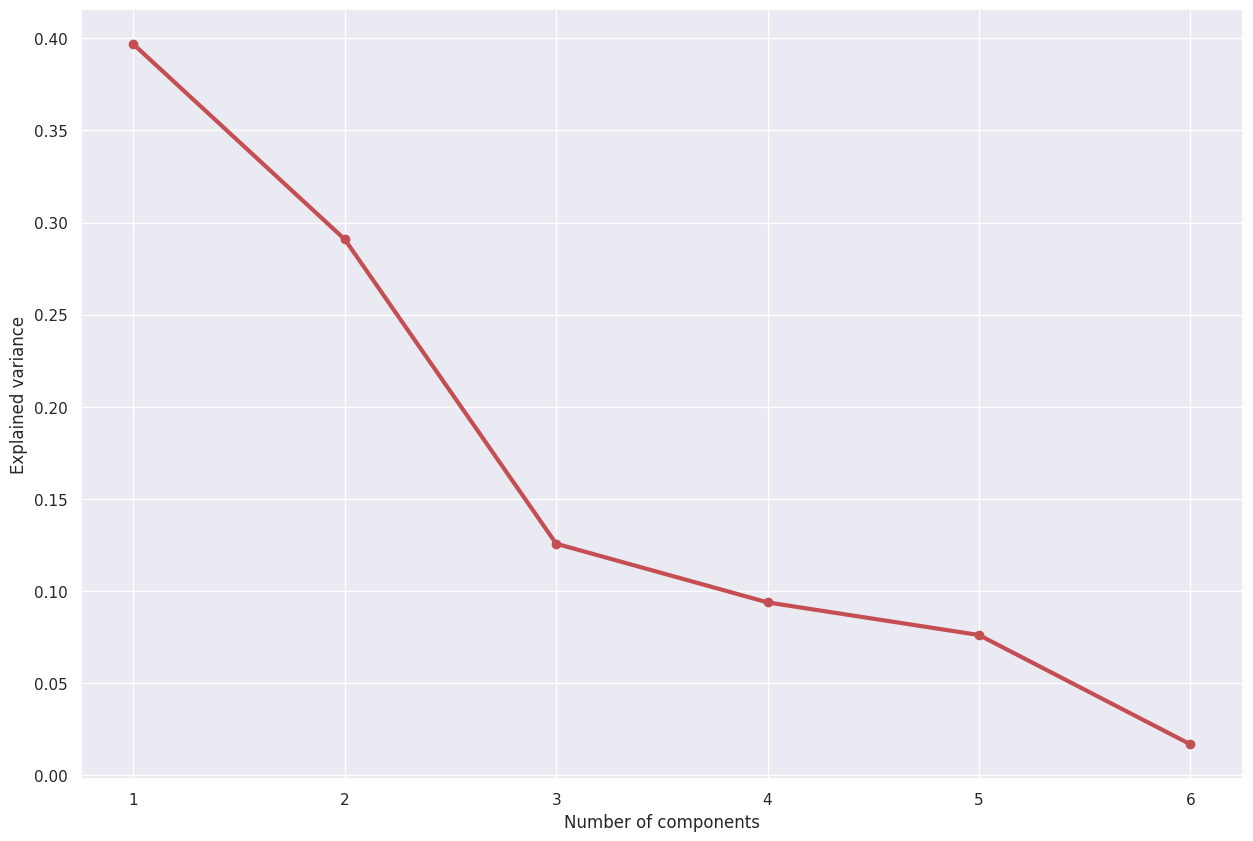

In [28]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

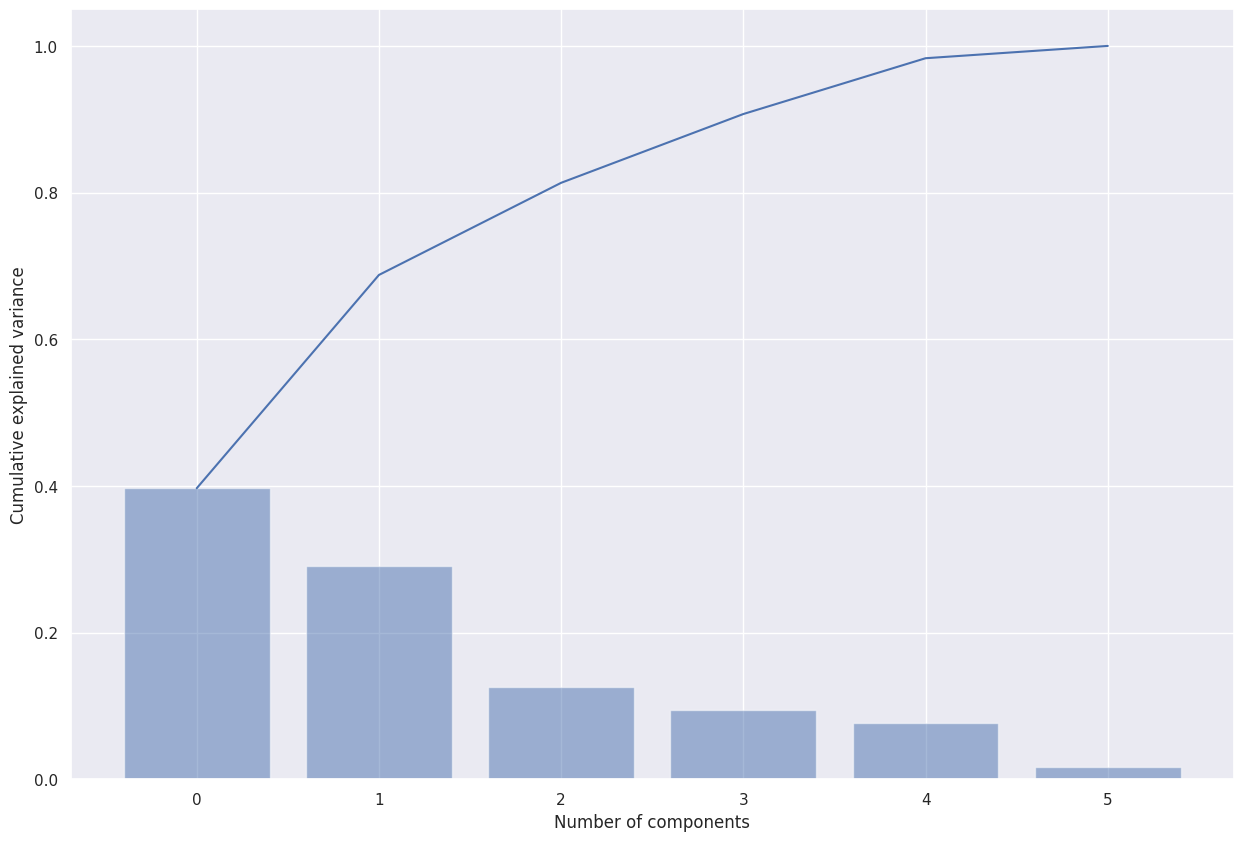

In [29]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([ 2.44109795, -1.74091819, -1.35694348, ...,  1.68933205,
        1.89102913,  1.92819763])

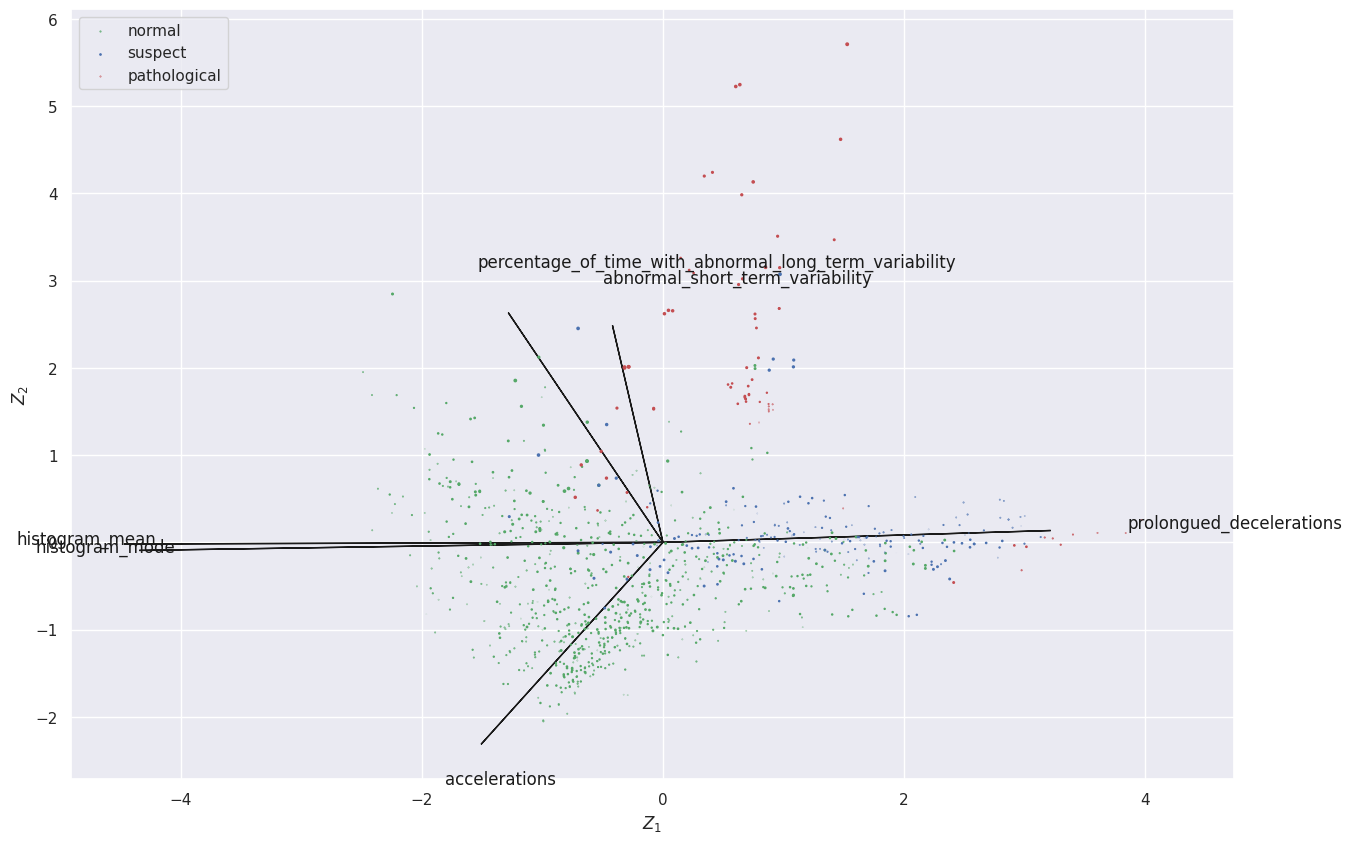

In [30]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')


plt.scatter(Z[idx_normal,1], Z[idx_normal,2], Z[idx_normal,3], c='g', label='normal')
plt.scatter(Z[idx_suspect,1], Z[idx_suspect,2], Z[idx_suspect,3], c='b', label='suspect')
plt.scatter(Z[idx_pathological,1], Z[idx_pathological,2], Z[idx_pathological,3], c='r', label='pathological')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [31]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.9 MB/s eta 0:00:00


In [32]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [33]:
out['PC']

PC1       PC2       PC3       PC4       PC5
0     0.185778  2.441098 -0.122551 -0.774045  0.587556
1    -0.258534 -1.740918 -0.636569  0.469074  0.508594
2    -0.055872 -1.356943 -1.044747  0.833090  0.161229
3     0.128533 -1.351401 -1.094494  0.729924  0.214096
4    -0.163400 -1.908414 -0.584439  0.295005  0.702838
...        ...       ...       ...       ...       ...
2108 -1.369571  1.994846  0.604422 -0.091347 -0.743351
2109 -1.276078  1.723787  0.685227 -0.243824 -0.700345
2110 -1.296545  1.689332  0.735976 -0.259265 -0.816603
2111 -1.284727  1.891029  0.650221 -0.241392 -0.489021
2112 -0.999944  1.928198  0.499019 -0.422814  0.196224

[2113 rows x 5 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (39.6% expl.var)', ylabel='PC2 (29.0% expl.var)'>)

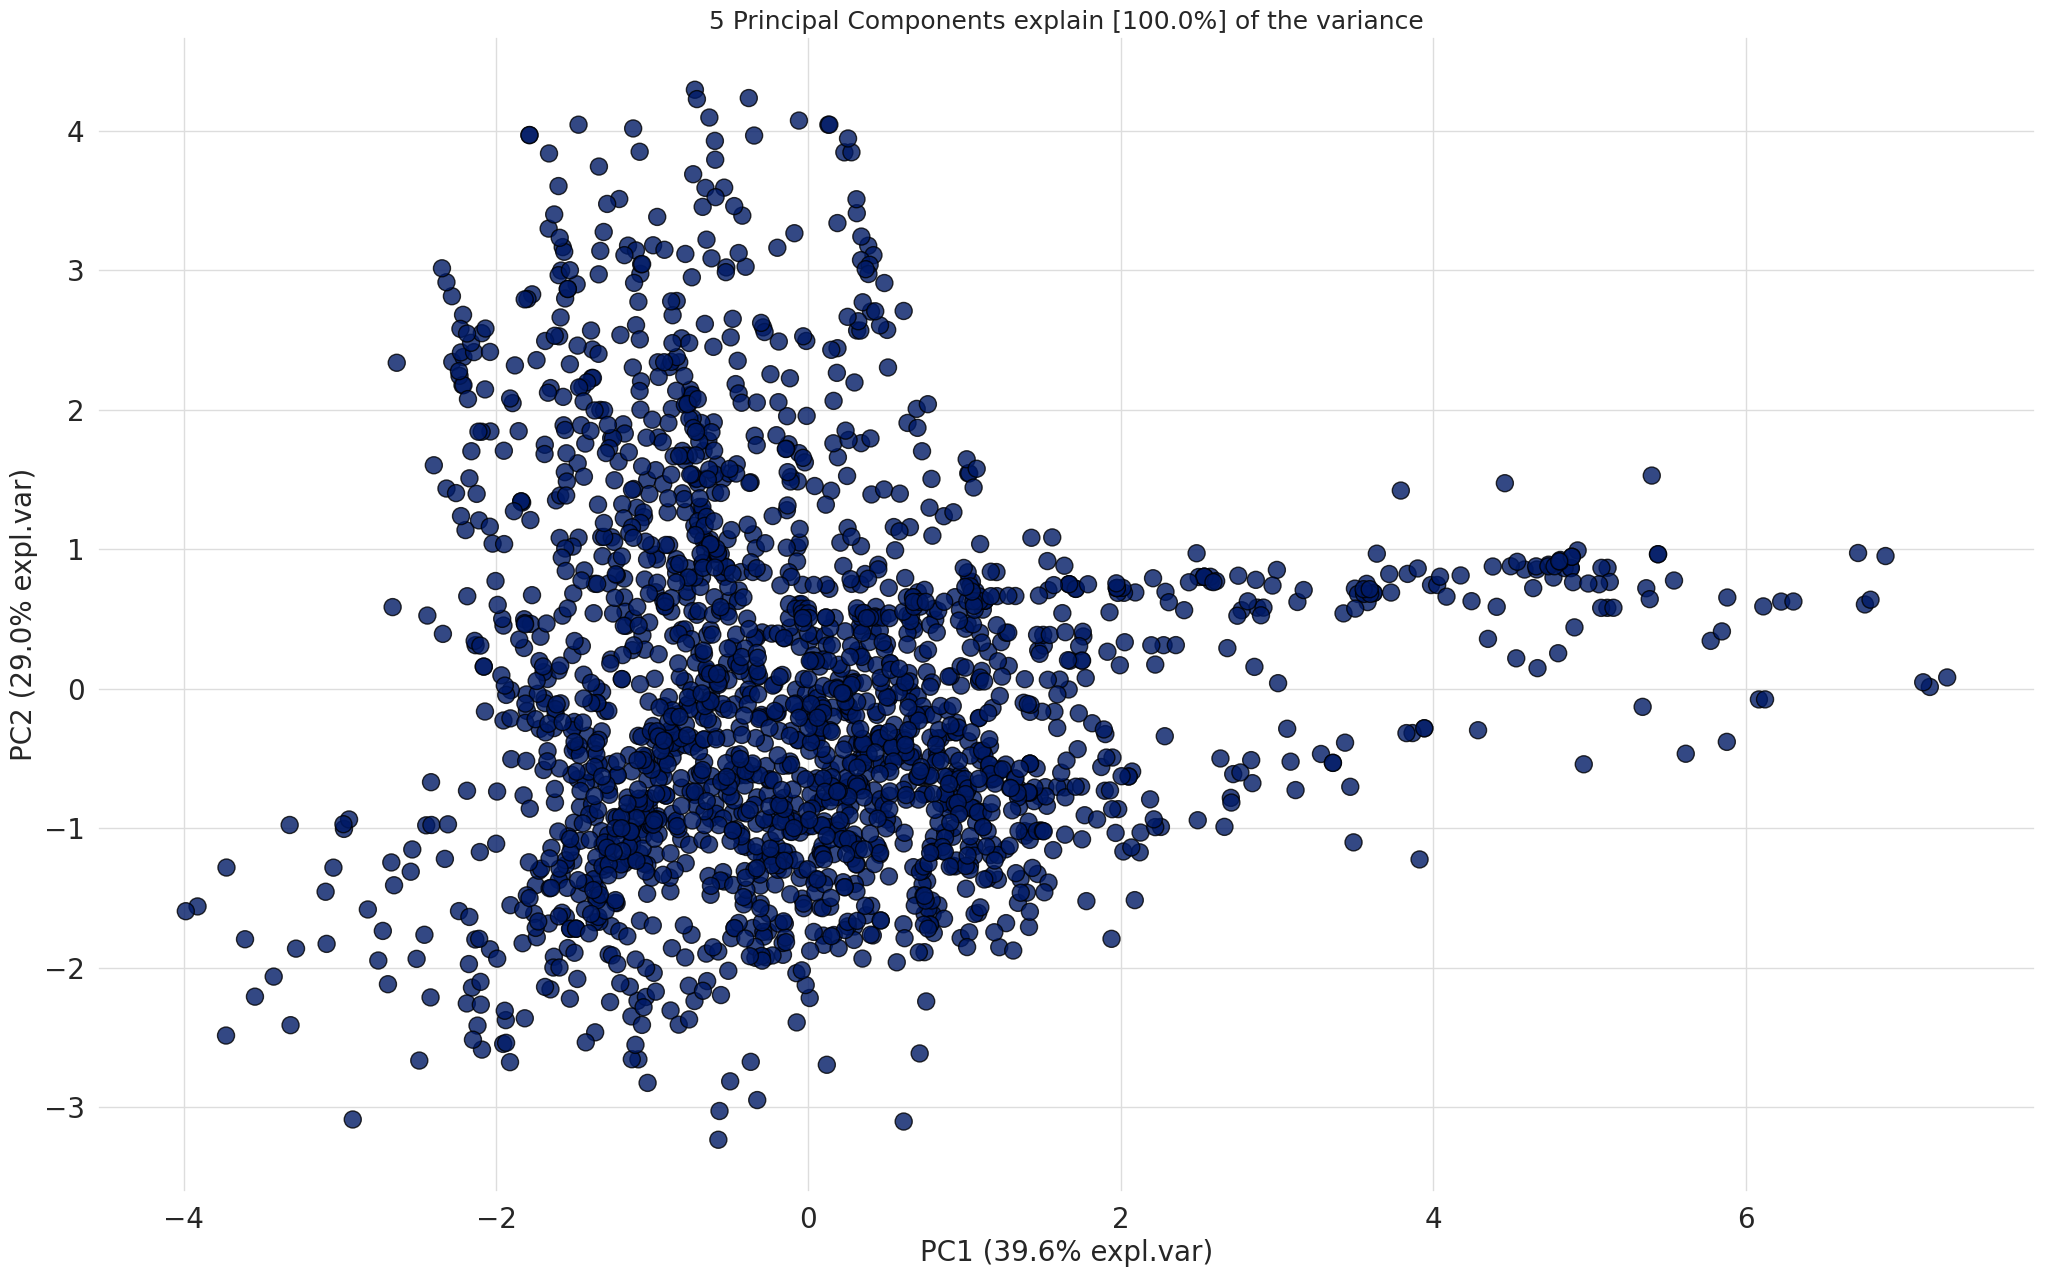

In [34]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [35]:
A = out['loadings'].T
A

PC1       PC2  \
accelerations                                      -0.206527 -0.538426   
prolongued_decelerations                            0.440397  0.031526   
abnormal_short_term_variability                    -0.057285  0.577810   
percentage_of_time_with_abnormal_long_term_vari... -0.175608  0.612172   
histogram_mode                                     -0.595085 -0.021574   
histogram_mean                                     -0.612496 -0.004377   

                                                         PC3       PC4  \
accelerations                                       0.476410 -0.452211   
prolongued_decelerations                            0.670923  0.582439   
abnormal_short_term_variability                     0.516254 -0.510381   
percentage_of_time_with_abnormal_long_term_vari... -0.095913  0.068374   
histogram_mode                                      0.167668  0.356455   
histogram_mean                                      0.138080  0.253075   

                                                         PC5  
accelerations                                       0.481693  
prolongued_decelerations                            0.114043  
abnormal_short_term_variability                    -0.368573  
percentage_of_time_with_abnormal_long_term_vari...  0.758188  
histogram_mode                                     -0.198120  
histogram_mean                                     -0.070841

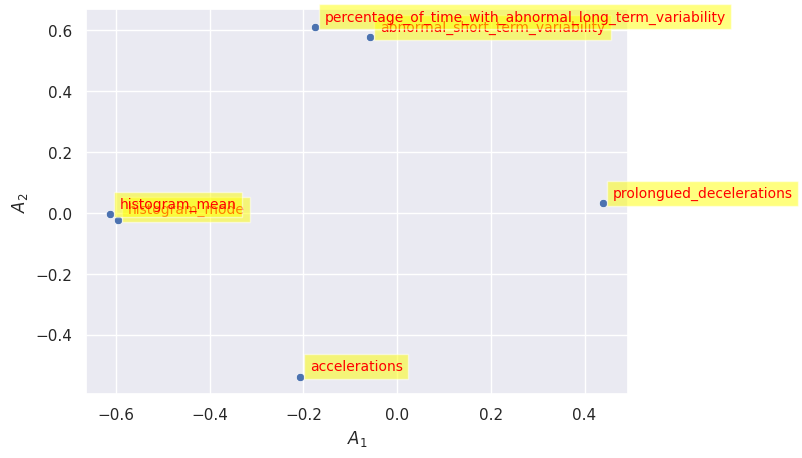

In [36]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


**Scree Plot**

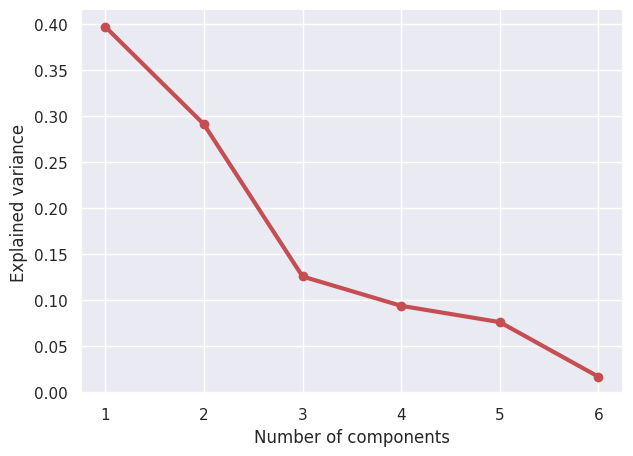

In [37]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

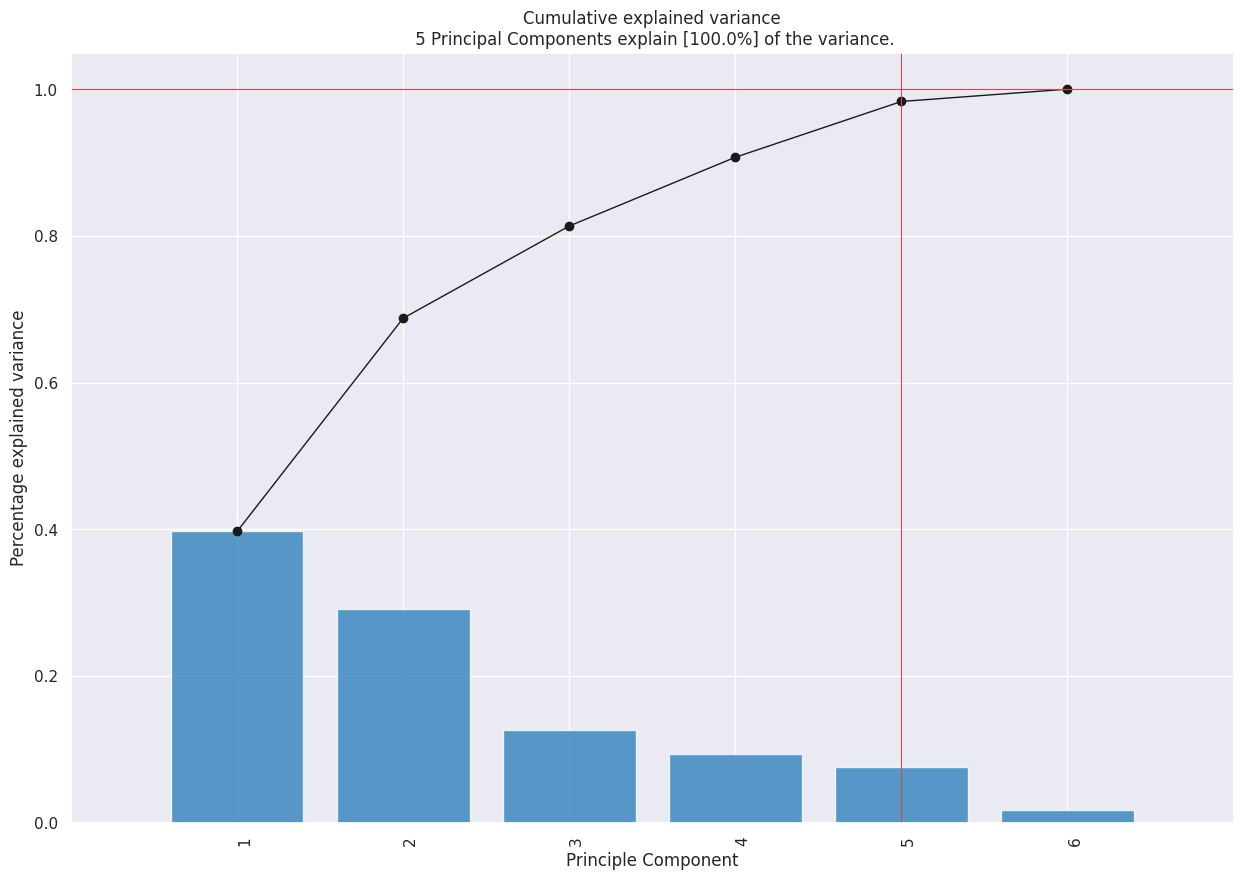

In [38]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (39.6% expl.var)', ylabel='PC2 (29.0% expl.var)'>)

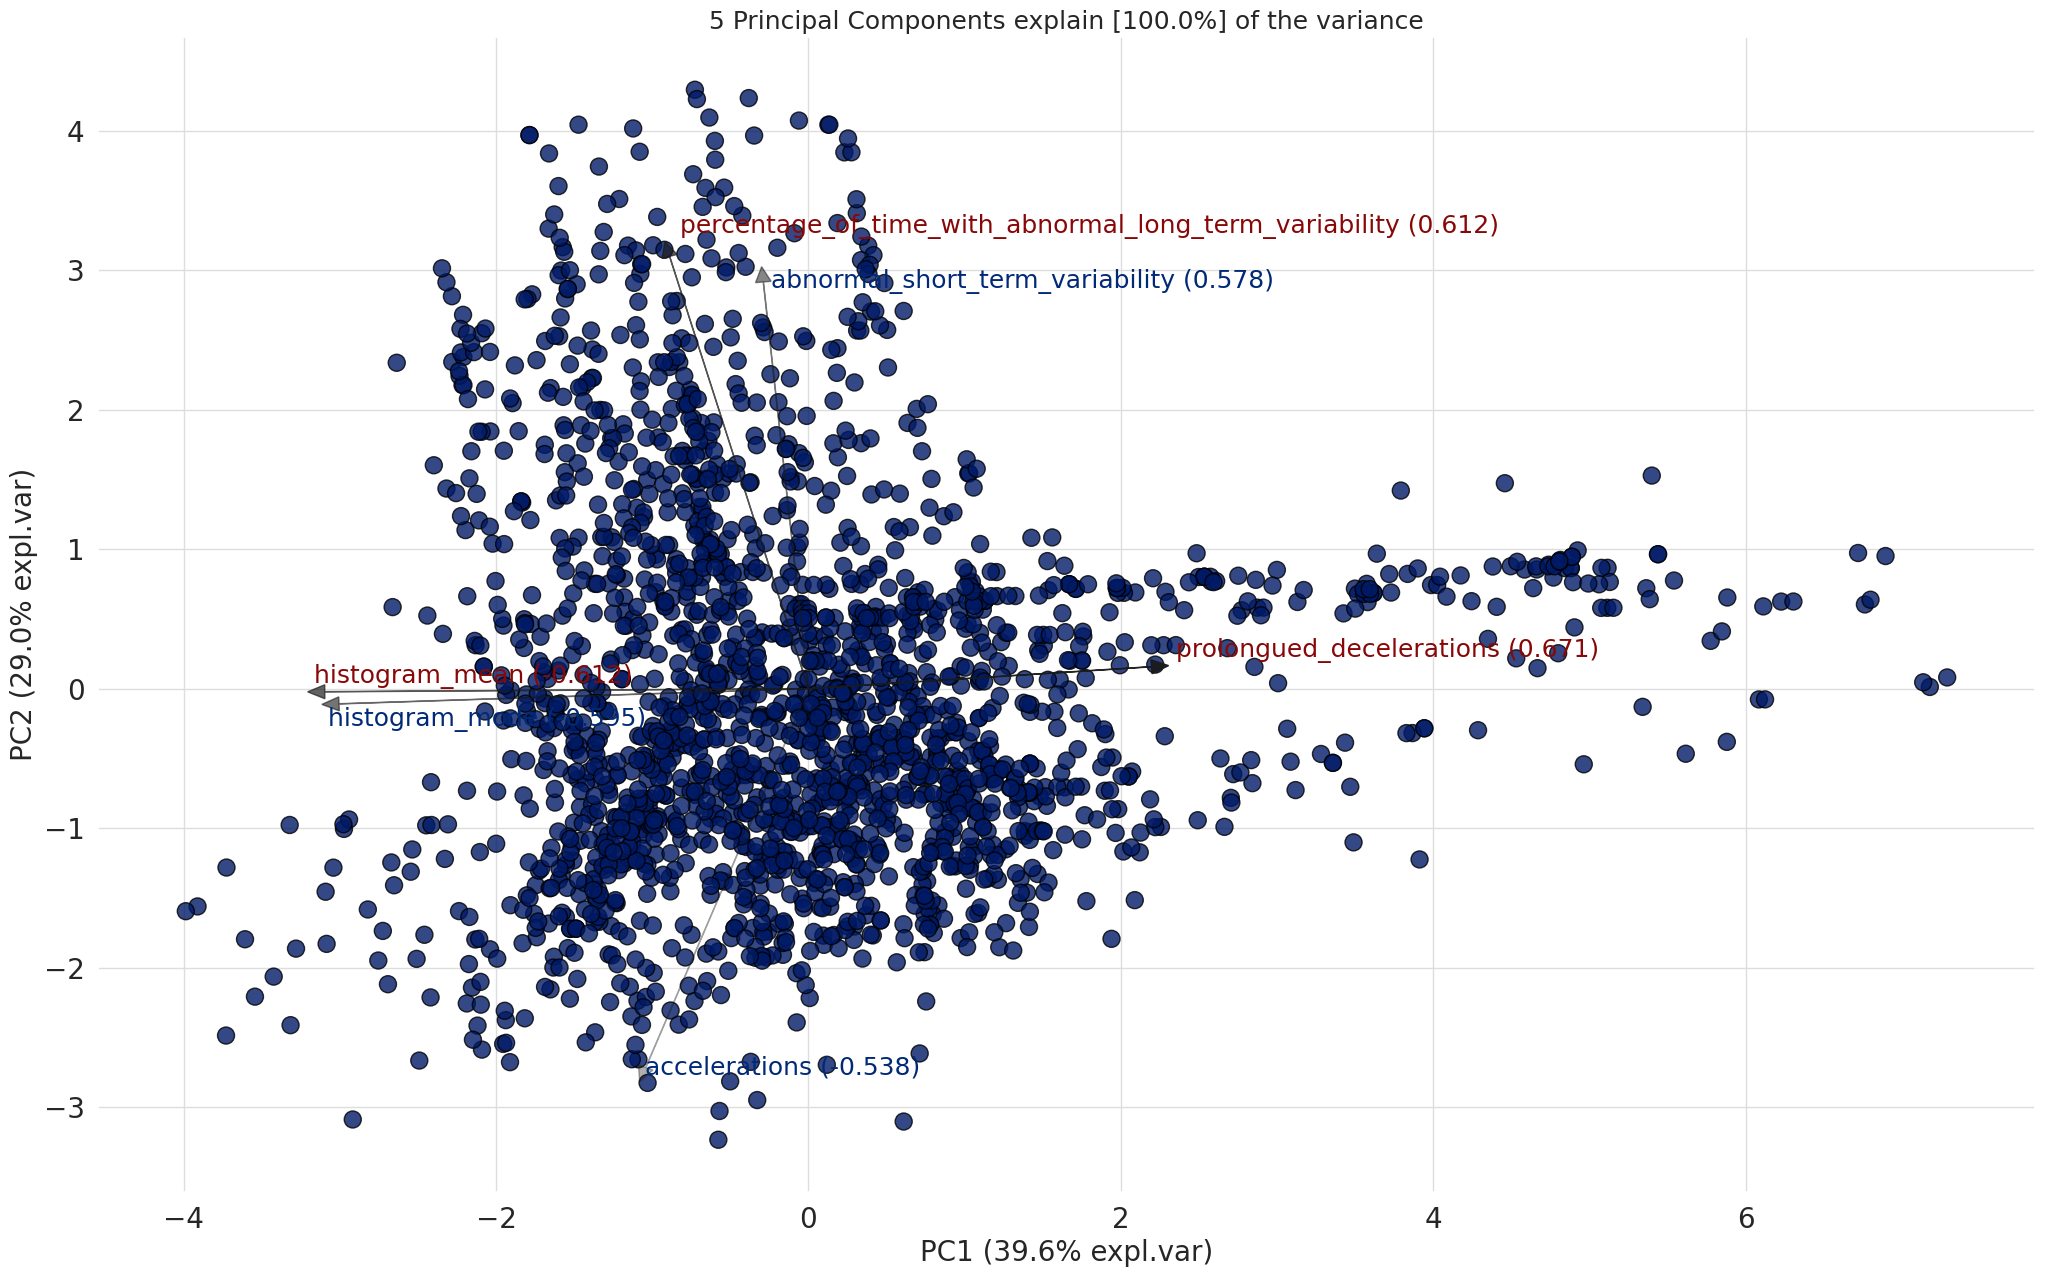

In [39]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '5 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (39.6% expl.var)', ylabel='PC2 (29.0% expl.var)', zlabel='PC3 (12.5% expl.var)'>)

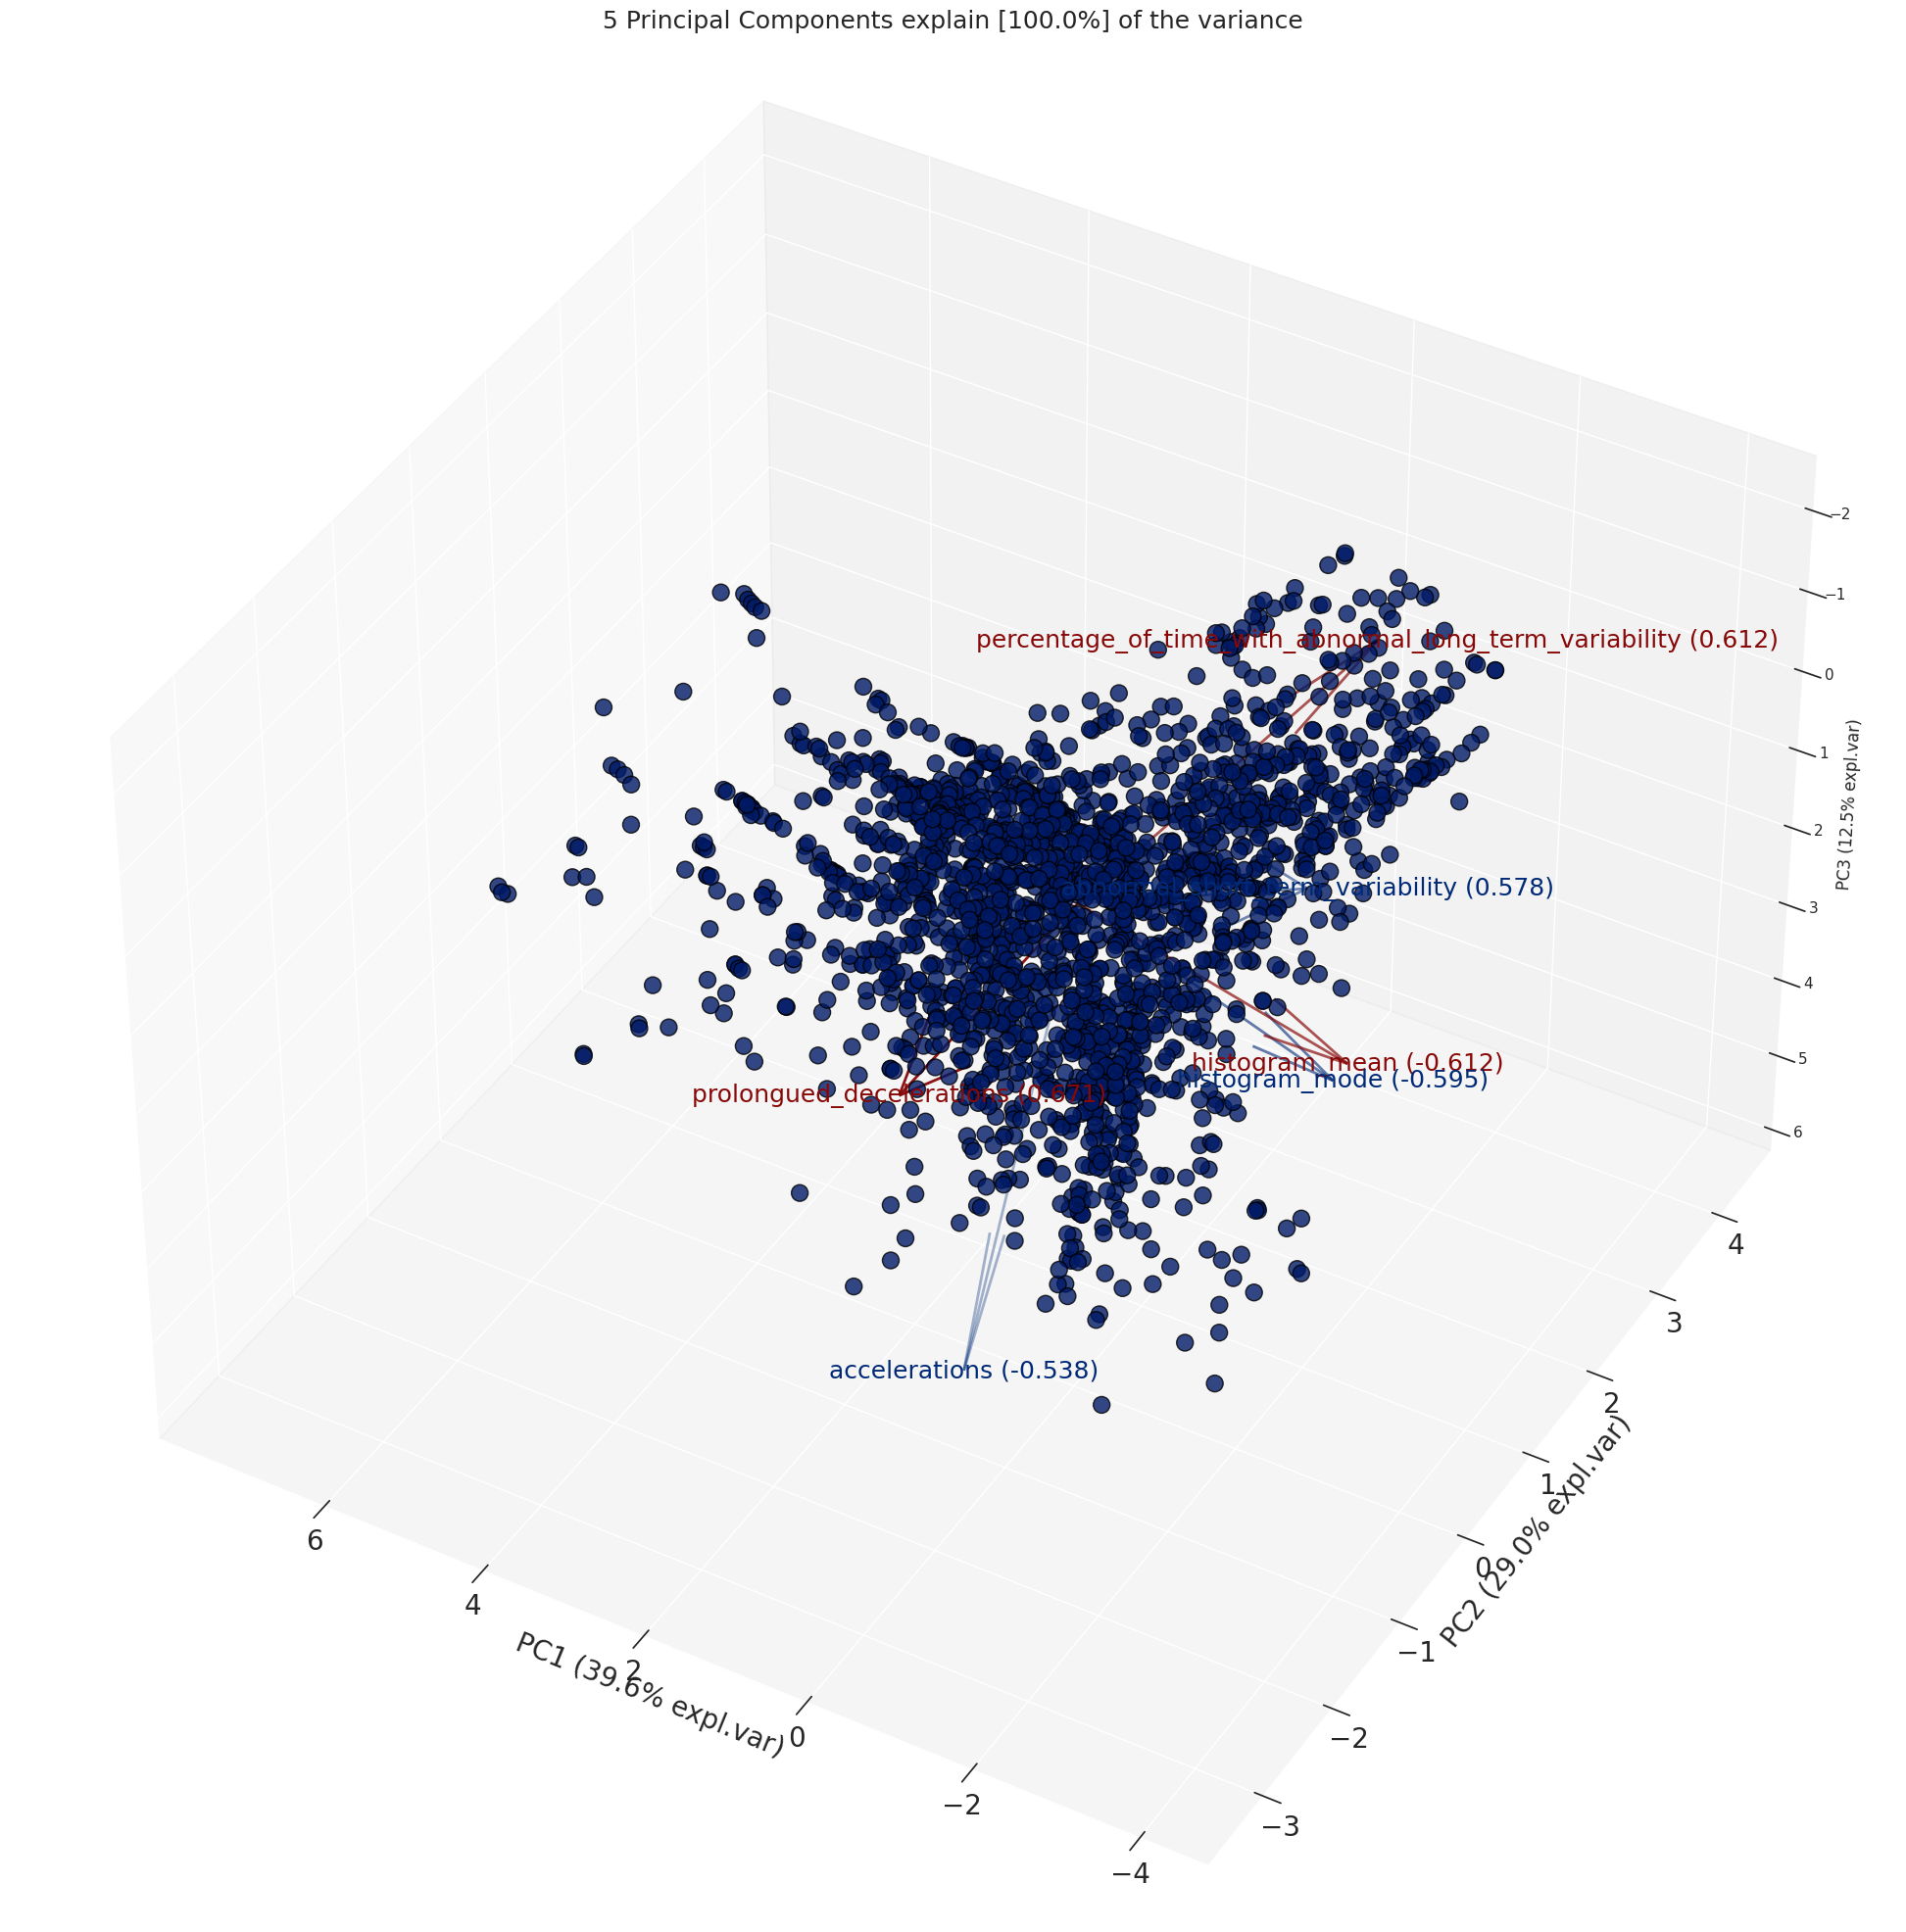

In [40]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found.
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [83]:
from pycaret.utils import version
version()

'3.2.0'

In [84]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1902, 7)
Unseen Data For Predictions: (211, 7)


In [85]:
from pycaret.classification import *
clf = setup(data=data, target='fetal_health', train_size=0.7, session_id=123)

**Comparing All Models**

In [92]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [93]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

 Create a Model

**Random Forest Classifier**

In [94]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [95]:
tuned_rf=tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [96]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate Random Forest Classifier**

In [99]:
from pycaret.classification import *

evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Extra Tree Classifier**

In [100]:
et = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model with K-nearest neighbour**

In [101]:
tuned_et = tune_model(et)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [102]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate model with K-nearest neighbour**

In [103]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Logistic Regression**

In [104]:
lr=create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune QDA Model**

In [105]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate QDA Model**

In [106]:
tuned_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [108]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [111]:
clf_pca = setup(data=data, target='fetal_health', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

# **Comparing Models**

In [112]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Best model with PCA**

In [113]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

# **Tune Best Model**

In [114]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Best Model**

In [115]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [116]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [117]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Model**

In [118]:
tuned_rf_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [119]:
evaluate_model(tuned_rf_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create ET Model**

In [120]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [121]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [122]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

# **Evaluate Model ET**

In [123]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create Logistic Regression Model**

In [124]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune model**

In [125]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Model**

In [126]:
tuned_lr_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [128]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [129]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [130]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [148]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [142]:
!pip install shap
!pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sqlalchemy 2.0.23 requires typing-extensions>=4.2.0, but you have typing-extensions 3.10.0.0 which is incompatible.
arviz 0.15.1 requires typing-extensions>=4.1.0, but you have typing-extensions 3.10.0.0 which is incompatible.
chex 0.1.7 requires typing-extensions>=4.2.0; python_version < "3.11", but you have typing-extensions 3.10.0.0 which is incompatible.
dash 2.14.2 requires typing-extensions>=4.1.1, but you have typing-extensions 3.10.0.0 which is incompatible.
flax 0.7.5 requires typing-extensions>=4.2, but you have typing-extensions 3.10.0.0 which is incompatible.
ibis-framework 6.2.0 requires typing-extensions<5,>

In [150]:
import shap

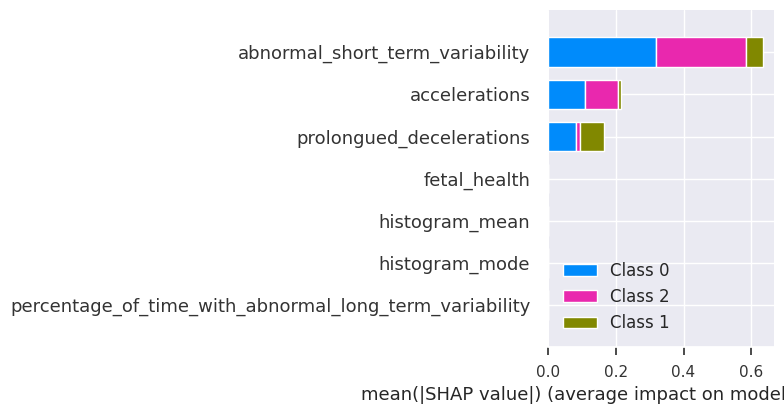

In [151]:
explainer = shap.TreeExplainer(tuned_rf_pca)

shap_values = explainer.shap_values(data)

shap.summary_plot(shap_values, data)

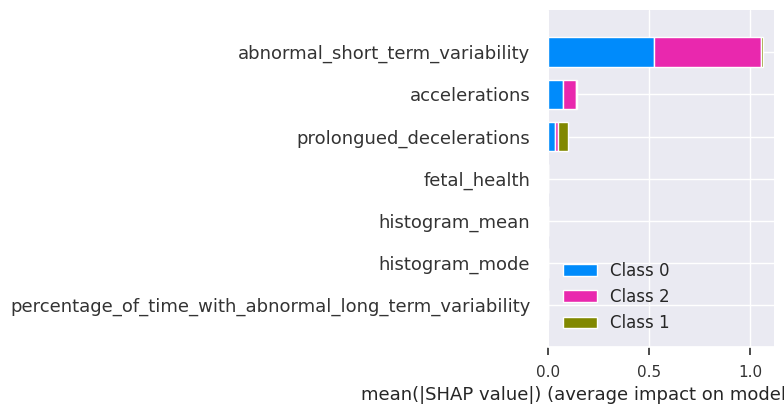

In [152]:
explainer = shap.TreeExplainer(tuned_et_pca)

shap_values = explainer.shap_values(data)

shap.summary_plot(shap_values, data)

In [157]:
explainer = shap.KernelExplainer(tuned_lr_pca)

shap_values = explainer.shap_values(data)

shap.summary_plot(shap_values, data)

TypeError: ignored